## Sequencing

Analyzing sequencing results (Sanger method) is a common cloning task that can eat up a lot of time without a lot of gain. The basic principle is that you receive the sequence for a short region of a template (usually a plasmid or PCR fragment) and need to compare it to your expected sequence to see if any errors were made (usualy mismatches/indels) or if you have confirmed a large enough part of your sequence (coverage). We'll go over how coral makes this straightforward and fast with a short example.

First, we'll need to analyze our sequencing using the Sanger class (`analysis` module) and read in sequences (`seqio` module).

In [1]:
import coral as cor

Then use seqio to read in our sequences. The Sanger class expects two inputs: a reference, or expected, sequence (`sequence.DNA` object) and a list of the results (`list` of `sequence.DNA` objects). Any way that you want to generate those objects is fine, but a simple way is to store them both in a single directory and then read them in.

As a reference sequence, I have a genbank file (actually an ApE file - but it's basically genbank) that includes the complete plasmid I sequenced annotated with a bunch of features. For this, use `seqio.read_dna`, which expects a path to the file (.ape, .gb, .fa, .fasta, .seq, .abi, and .ab1 are all acceptable formats).

In the same folder there are 15 results which should cover the entire plasmid and show that the sequence is accurate. For this, we use `seqio.read_sequencing`, which accepts a path to a folder and reads in all sequencing (.seq, .ab1, .abi) files and stores them as a list of DNA objects.

In [2]:
reference = cor.seqio.read_dna('../files_for_tutorial/maps/pMODKan-HO-pACT1GEV.ape')
results = cor.seqio.read_sequencing('../files_for_tutorial/sequencing_files/')

To compare the results to our expected sequence, we use the `Sanger` class, which does a Needleman-Wunsch alignment and scores any discrepancies.

In [3]:
alignment = cor.analysis.Sanger(reference, results)

The Sanger alignment object contains our aligned sequences and some methods for analyzing them.

Chiefly, it's useful to look at where predicted mismatches or indels are predicted, as they may disagree with the consensus.

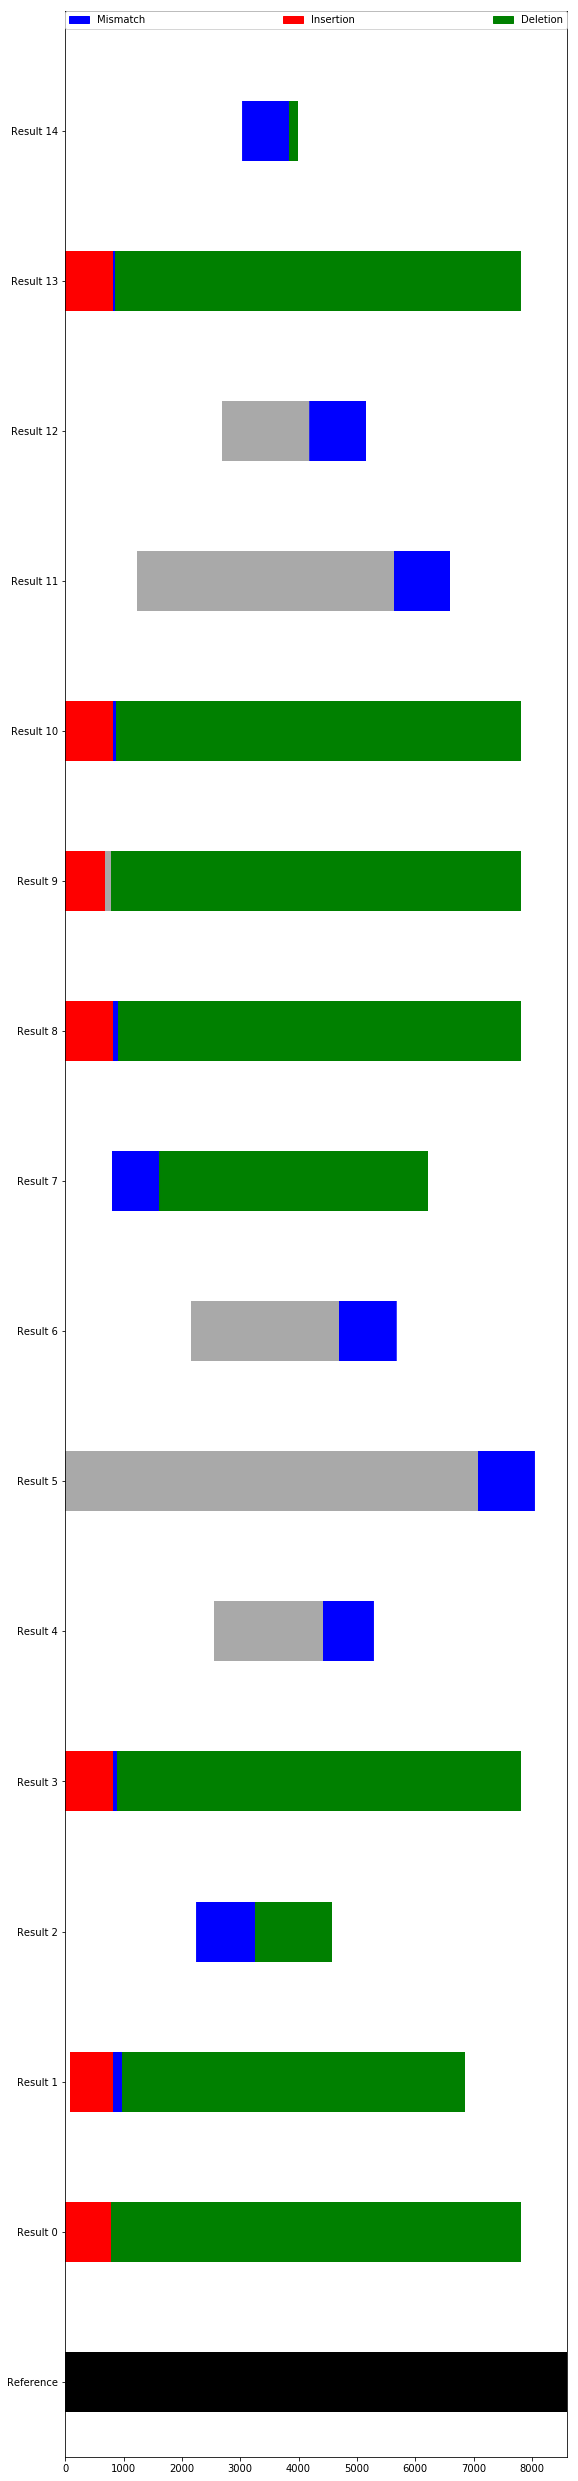

In [5]:
alignment.plot()

The plot is a bit ugly right now, but very functional. The deletions are all right at the beginning or end of our results and so probably aren't really there. In addition, there is another sequencing result showing no deletions at every one of those locations - we can reasonably assume those deletions are not actually there. If we were worried, however, we could investigate the ab1 files directly in another program.